<a href="https://colab.research.google.com/github/sberniz/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module1-Architect/Santiago_Berniz_LS_DS_431_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [ ]:
!pip install quickdraw

## Load Your Data

In [ ]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [ ]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

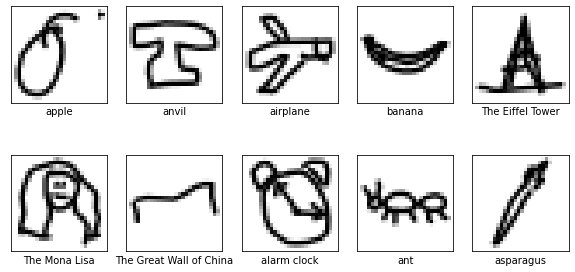

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [ ]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

In [ ]:
X.shape

(100000, 784)

In [ ]:
type(X[0][0])

numpy.uint8

In [ ]:
X[0]

In [ ]:
X = X.astype('float32') / 255.

In [ ]:
X.shape

(100000, 784)

In [ ]:
model = Sequential()

In [ ]:
model.add(
    # Hidden Leyer
    Dense(50, activation="relu", input_dim=784)
)

In [ ]:
model.add(
    Dense(50,activation="relu",input_dim=784)
)

In [ ]:
#Output Layer 
model.add(
    Dense(10, activation='softmax')
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
results = model.fit(X,y, epochs=30, validation_split=0.2)

Epoch 1/30


Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7fece5af2860>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


2500/2500 [==============================] - 5s 2ms/step - loss: 0.7297 - accuracy: 0.7830 - val_loss: 0.5668 - val_accuracy: 0.8299
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5388 - accuracy: 0.8388 - val_loss: 0.5229 - val_accuracy: 0.8431
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4840 - accuracy: 0.8552 - val_loss: 0.4926 - val_accuracy: 0.8531
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4480 - accuracy: 0.8650 - val_loss: 0.5077 - val_accuracy: 0.8464
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4222 - accuracy: 0.8729 - val_loss: 0.4840 - val_accuracy: 0.8529
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4034 - accuracy: 0.8775 - val_loss: 0.4729 - val_accuracy: 0.8600
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3854 - accuracy: 0.8843 - val_loss: 0.4801 - val_accuracy: 0.8584
Epo

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [ ]:
results.history

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


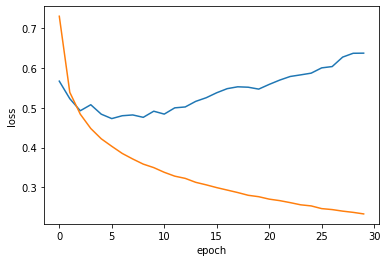

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.1)
var1 = tf.Variable(X)
loss = lambda: (var1 ** 2)/2.0      
step_count = adam.minimize(loss, [var1]).numpy()
var1.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results2 = model.fit(X,y, epochs=30, validation_split=0.2)

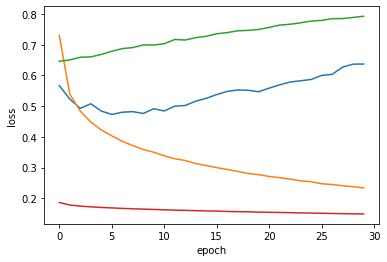

In [ ]:

df2 = pd.DataFrame.from_records(results2.history)
df2['epoch'] = [i for i in range(df2.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);
ax2 = sns.lineplot(x='epoch', y='val_loss', data=df2)
ax2 = sns.lineplot(x='epoch', y='loss', data=df2);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? binary CrossEntropy is best for predicting 1/0 because 1/0 is binary hence it'll be better at predicting. 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? loss function predicts error, accuracy predicts how accurate is the modelLoss value implies how poorly or well a model behaves after each iteration of optimization.
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

SGD only computes on a small subset or random selection of data examples. SGD produces the same performance as regular gradient descent when the learning rate is low.Adams is faster and also combines the advantages of two SGD extensions — Root Mean Square Propagation (RMSProp) and Adaptive Gradient Algorithm (AdaGrad) — and computes individual adaptive learning rates for different parameters 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)